In [75]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sve
import plotly.express as px

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder



## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
player=pd.read_csv(r"C:\Users\Lama\OneDrive\سطح المكتب\Twaiq\week1\Usecase-7\final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [3]:
player.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
player.shape

(10754, 22)

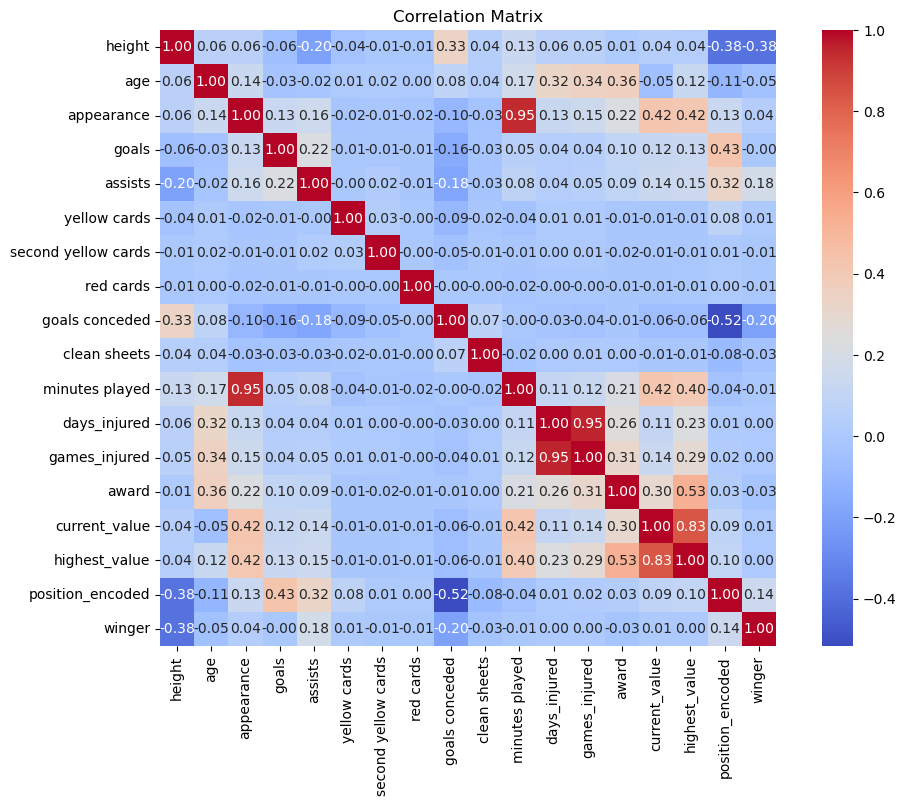

In [5]:
corr_matrix = player.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

In [84]:
#profile_report = player.profile_report(
   # explorative=True, html={"style": {"full_width": True}}
#)
#profile_report

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [85]:
#Data Source: in the kaggle page (https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data) 
#Open Access to data (opne source data are publicly accessible)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [86]:
#Data collection occurred for the seasons 2021-2022 and 2022-2023., addressing business problems.

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [87]:
# i have data from one sources so no need to check consistency

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [6]:
player.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [7]:
#Delete unrelevent columns, this column not relevent to busniss statment and have alot null value so can change analysis data
player.drop(['player'],axis=1,inplace=True)

In [8]:
player.drop(['minutes played'],axis=1,inplace=True)

In [9]:
player.drop(['position_encoded'],axis=1,inplace=True)

In [32]:
player.drop(['days_injured'],axis=1,inplace=True)

In [11]:
player.shape

(10754, 19)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [12]:
# check
player.duplicated().sum()

0

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [13]:
#Display number missing values per column
player.isnull().sum().sort_values(ascending= False)

team                   0
red cards              0
highest_value          0
current_value          0
award                  0
games_injured          0
days_injured           0
clean sheets           0
goals conceded         0
second yellow cards    0
name                   0
yellow cards           0
assists                0
goals                  0
appearance             0
age                    0
height                 0
position               0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [14]:
player.tail(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,days_injured,games_injured,award,current_value,highest_value,winger
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.0,0.0,0,0,0,50000,50000,0
10753,Western Sydney Wanderers,Alexander Badolato,Attack Centre-Forward,170.000000,18.0,21,0.000000,0.000000,0.086042,0.0,0.000000,0.0,0.0,0,0,0,25000,25000,0


In [15]:
# check columns types
player.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

In [162]:
# check outliers

In [16]:
fig = px.histogram(player, x='highest_value', title='Histogram of highest_value')
fig.update_layout(xaxis_title='highest_value')
fig.show()

In [17]:
player["highest_value"].describe()

count    1.075400e+04
mean     6.152606e+06
std      1.338988e+07
min      0.000000e+00
25%      4.500000e+05
50%      1.500000e+06
75%      5.000000e+06
max      2.000000e+08
Name: highest_value, dtype: float64

In [18]:
player=player[
    (player['highest_value'] < 4.000000e+07) & (player['highest_value'] > 4.900000e+05)
]

In [19]:
player.shape

(7617, 19)

In [20]:
fig = px.histogram(player, x='current_value', title='Histogram of current_value')
fig.update_layout(xaxis_title='current_value')
fig.show()

In [21]:
player["current_value"].describe()

count    7.617000e+03
mean     3.403706e+06
std      5.332438e+06
min      0.000000e+00
25%      6.000000e+05
50%      1.400000e+06
75%      3.500000e+06
max      3.800000e+07
Name: current_value, dtype: float64

In [22]:
player=player[
    (player['current_value'] <= 3.000000e+07) & (player['current_value'] > 5.00000e+05)
]

In [23]:
player.shape

(5988, 19)

In [24]:
fig = px.histogram(player, x='age', title='Histogram of age')
fig.update_layout(xaxis_title='age')
fig.show()

In [25]:
player=player[
    (player['age'] <= 37) & (player['age'] > 17)
]

In [26]:
fig = px.histogram(player, x='appearance', title='Histogram of appearance')
fig.update_layout(xaxis_title='appearance')
fig.show()

In [27]:
player=player[
    (player['appearance'] <= 89) & (player['appearance'] > 1)
]

In [28]:
fig = px.histogram(player, x='award', title='Histogram of award')
fig.update_layout(xaxis_title='award')
fig.show()

In [29]:
player=player[
    (player['award'] <= 20)
]

In [30]:
player.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

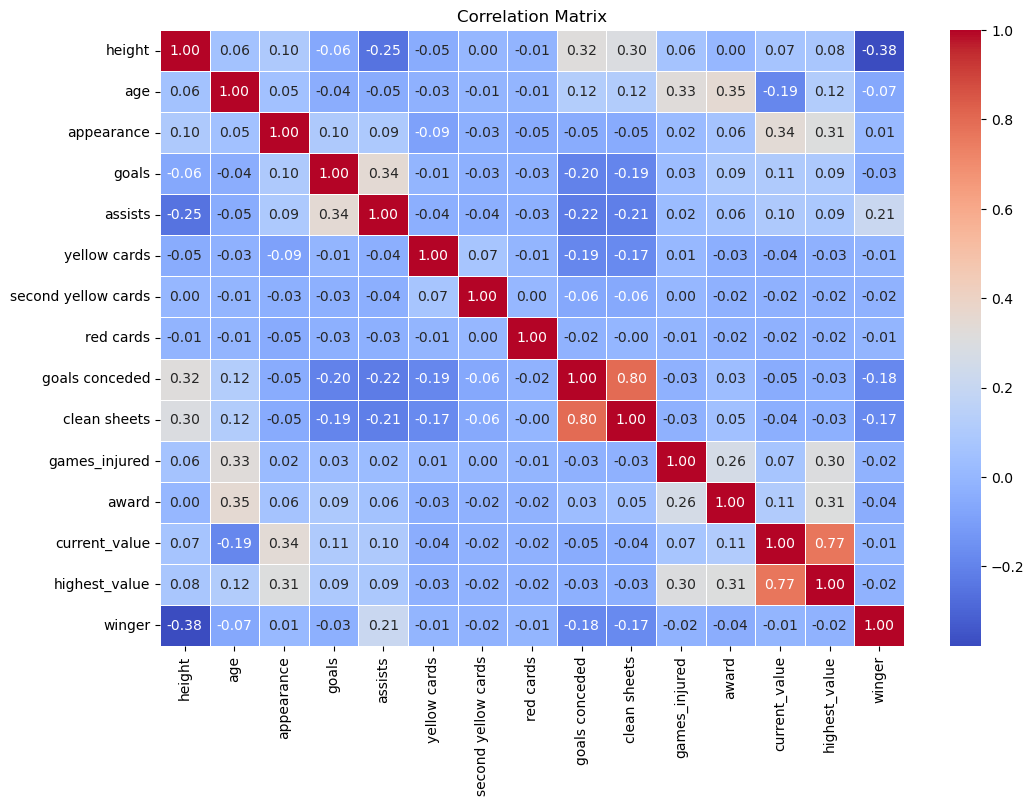

In [33]:
correlation_matrix = player.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [34]:
player.shape

(5724, 18)

In [35]:
categorical_features = ['team', 'name', 'position']
numeric_features = ['height', 'age', 'appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets'
                    ,'games_injured','award','current_value','highest_value','winger']

# Bivariate/Multivariate Analysis:

### As we can observe, the high values for Attack - Second Striker and Midfield - Attacking Midfield positions are due to their roles on the field and their higher goal-scoring rates. Positions like Attack - Second Striker and Midfield - Attacking Midfield have higher average values because of their significant contribution to scoring and creating opportunities.

In [36]:
import plotly.express as px

#mean of current value  
position_avg_value = player.groupby('position')['current_value'].mean().reset_index()
#create bar char
fig = px.bar(position_avg_value, x='position', y='current_value', 
             title='Bar Chart of Position vs Average Current Value',
             labels={'position': 'Position', 'current_value': 'Average Current Value'})
fig.update_layout(xaxis_title='Position', yaxis_title='Average Current Value')
fig.show()



### Southampton FC represents the club with the highest total market value of players among the top five clubs. The other clubs have close percentages, indicating a general balance in the market values of players across these teams

In [37]:
import plotly.express as px

# culculate the total of current value in all plyer in teame 
top_team = player.groupby('team')['current_value'].sum().nlargest(5).reset_index()
#creeat pie chart
fig = px.pie(top_team, values='current_value', names='team', title='Top 5 team by Total Player Current Value')
fig.update_traces(textinfo='percent+label')
fig.show()


### This plot shows a strong relationship between the current value and the highest value, as well as a clustering of points at lower values.

In [38]:
# scatter to show relation between highest_value and current_value
fig = px.scatter(player, x='highest_value', y='current_value', 
                 title='Scatter Plot of Current Value vs Highest Value',
                 labels={'highest_value': 'Highest Value', 'current_value': 'Current Value'})
fig.show()

#  2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [39]:
categorical_features

['team', 'name', 'position']

In [40]:
numeric_features

['height',
 'age',
 'appearance',
 'goals',
 'assists',
 'yellow cards',
 'second yellow cards',
 'red cards',
 'goals conceded',
 'clean sheets',
 'games_injured',
 'award',
 'current_value',
 'highest_value',
 'winger']

In [41]:
# one hot coding
player = pd.get_dummies(player, columns=categorical_features)

In [42]:
player.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,0,0,0,0,1,0,0,0,0,0
2,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,...,0,0,0,0,1,0,0,0,0,0


In [43]:
# Calculate the 35th and 75th percentiles of the price
p35 = player['current_value'].quantile(0.35)
p75 = player['current_value'].quantile(0.75)

# Function to categorize prices
def categorize_value(current_value):
    if current_value < p35:
        return 'low_current_value'
    elif current_value < p75:
        return 'Good_Price'
    else:
        return 'High_current_value'

# Apply the function to create a new column
player['categorize_current_value'] = player['current_value'].apply(categorize_value)

player.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(player['categorize_current_value'].value_counts())

Good_Price            2253
low_current_value     1822
High_current_value    1649
Name: categorize_current_value, dtype: int64


In [44]:
p35, p75

(1200000.0, 4000000.0)

In [48]:
encoder = LabelEncoder()
player['categorize_current_value'] = encoder.fit_transform(player['categorize_current_value'])  

In [50]:
player.head(3)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,categorize_current_value
1,196.0,30.0,15,0.0,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,0,0,0,1,0,0,0,0,0,0
2,188.0,37.0,4,0.0,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,0,0,0,1,0,0,0,0,0,2
6,187.0,28.0,70,0.0,0.032901,0.115153,0.0,0.0,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,1


#### 3. Feature selection

In [53]:
correlation = player.select_dtypes(include=['number']).corr()
print(correlation['categorize_current_value'].sort_values(ascending=False))

categorize_current_value             1.000000
team_Cerezo Osaka                    0.062194
team_Go Ahead Eagles                 0.061047
team_Querétaro FC                    0.057014
team_Avispa Fukuoka                  0.056145
                                       ...   
position_midfield-CentralMidfield   -0.044820
games_injured                       -0.050079
award                               -0.067990
appearance                          -0.109400
highest_value                       -0.123035
Name: categorize_current_value, Length: 6066, dtype: float64


In [71]:
# Set the correlation threshold
threshold = 0.05 # You can change this value based on your requirement ,i want the + and - relation 

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['categorize_current_value']) > threshold]['categorize_current_value'].index
selected_features


Index(['appearance', 'games_injured', 'award', 'highest_value',
       'team_Avispa Fukuoka', 'team_Cerezo Osaka', 'team_FC Vizela',
       'team_Fakel Voronezh', 'team_GD Chaves', 'team_Go Ahead Eagles',
       'team_Hokkaido Consadole Sapporo', 'team_Kaizer Chiefs',
       'team_Kashiwa Reysol', 'team_Kyoto Sanga', 'team_Orlando Pirates',
       'team_Pohang Steelers', 'team_Querétaro FC',
       'team_SC Cambuur Leeuwarden', 'team_SuperSport United',
       'team_Suwon Samsung Bluewings', 'categorize_current_value'],
      dtype='object')

In [66]:
selected_features =['appearance', 'games_injured', 'award', 'highest_value',
       'team_Avispa Fukuoka', 'team_Cerezo Osaka', 'team_FC Vizela',
       'team_Fakel Voronezh', 'team_GD Chaves', 'team_Go Ahead Eagles',
       'team_Hokkaido Consadole Sapporo', 'team_Kaizer Chiefs',
       'team_Kashiwa Reysol', 'team_Kyoto Sanga', 'team_Orlando Pirates',
       'team_Pohang Steelers', 'team_Querétaro FC',
       'team_SC Cambuur Leeuwarden', 'team_SuperSport United',
       'team_Suwon Samsung Bluewings', 'categorize_current_value']

In [67]:
player = player[selected_features]
player.head()

,appearance,games_injured,award,highest_value,team_Avispa Fukuoka,team_Cerezo Osaka,team_FC Vizela,team_Fakel Voronezh,team_GD Chaves,team_Go Ahead Eagles,...,team_Kaizer Chiefs,team_Kashiwa Reysol,team_Kyoto Sanga,team_Orlando Pirates,team_Pohang Steelers,team_Querétaro FC,team_SC Cambuur Leeuwarden,team_SuperSport United,team_Suwon Samsung Bluewings,categorize_current_value
1,15,58,1,22000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,84,4,6000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,70,19,10,35000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,169,7,20000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,34,13,0,2000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4. Prepare train and test data

In [79]:
# Prepare data
X = player.drop(['categorize_current_value'], axis=1)
y = player['categorize_current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
X.shape

(5724, 20)

## Buliding the Model

In [76]:
model = LogisticRegression()

## Train the Model

In [80]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [81]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [82]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-0.235641
games_injured,0.312394
award,0.162766
highest_value,-2.548480
team_Avispa Fukuoka,0.185746
team_Cerezo Osaka,0.292910
team_FC Vizela,0.211713
team_Fakel Voronezh,0.174414
team_GD Chaves,0.175519
team_Go Ahead Eagles,0.207765


In [83]:
model.coef_

array([[-0.01166936,  0.09498746,  0.06295483,  0.39537752, -0.1253338 ,
         0.01285509, -0.1286627 , -0.10675328, -0.10922868, -0.13237091,
        -0.11185808,  0.02619093, -0.12011055, -0.12725246,  0.04604002,
        -0.09734908,  0.03652148,  0.01734188, -0.12673094, -0.12734544],
       [ 0.24731082, -0.4073816 , -0.22572084,  2.15310237, -0.0604125 ,
        -0.30576549, -0.08305056, -0.06766071, -0.06629035, -0.07539455,
        -0.05067787, -0.13393877, -0.0653154 , -0.06343427, -0.16503534,
        -0.04659303, -0.19865856, -0.15161023, -0.07170969, -0.05882633],
       [-0.23564146,  0.31239414,  0.16276601, -2.54847989,  0.1857463 ,
         0.2929104 ,  0.21171326,  0.17441399,  0.17551903,  0.20776546,
         0.16253596,  0.10774784,  0.18542595,  0.19068673,  0.11899531,
         0.14394211,  0.16213709,  0.13426835,  0.19844064,  0.18617177]])

In [84]:
print(model.intercept_) 

[ 0.72449608  0.02450658 -0.74900266]


## Evaluating the Model 

In [85]:
# our benchmark model
base_model = round(player['categorize_current_value'].value_counts()[1]/player.shape[0]*100, 2)
base_model

28.81

1. Accuracy

In [86]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6917030567685589

In [87]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.6783140423673291

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[298,  37, 130],
       [117, 209,   0],
       [ 62,   7, 285]], dtype=int64)

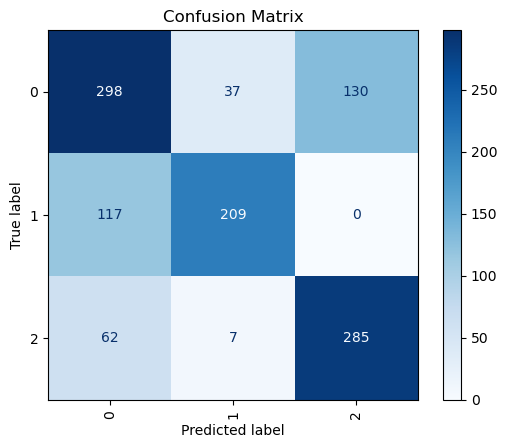

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.71


In [91]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.70


In [92]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.70
